In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tabulate import tabulate

In [21]:
dataset = pd.read_csv(r"Data\sleep_duration.csv")
dataset.head()

,Nama Mahasiswa,Durasi Tidur (Jam)
0,Adnan R.,7.0
1,Bunga S.,6.5
2,Candra M.,7.8
3,Dian P.,7.2
4,Eko H.,6.0


In [8]:
check_typedata = print(dataset.dtypes)

Nama Mahasiswa         object
Durasi Tidur (Jam)    float64
dtype: object


In [9]:
check_duplicated = dataset.duplicated().sum()
print(f"Result: {check_duplicated}")

Result: 0


In [10]:
check_nun = dataset.isnull().sum()
print(f"result = {dataset.isnull().sum()}")

result = Nama Mahasiswa        0
Durasi Tidur (Jam)    0
dtype: int64


In [11]:
durasi = dataset['Durasi Tidur (Jam)']

Q1 = durasi.quantile(0.25)
Q3 = durasi.quantile(0.75)

IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = dataset[(durasi < batas_bawah) | (durasi > batas_atas)]

print(f"--- Hasil Perhitungan IQR ---")
print(f"Q1 (25th Percentile): {Q1:.2f} jam")
print(f"Q3 (75th Percentile): {Q3:.2f} jam")
print(f"IQR (Q3 - Q1): {IQR:.2f} jam")
print(f"Batas Bawah (Lower Bound): {batas_bawah:.2f} jam")
print(f"Batas Atas (Upper Bound): {batas_atas:.2f} jam")
print("-" * 30)

if outliers.empty:
    print("STATUS: Tidak ditemukan Outlier berdasarkan metode IQR.")
else:
    print(f"STATUS: Ditemukan {len(outliers)} Outlier berdasarkan metode IQR:")
    print(outliers)

--- Hasil Perhitungan IQR ---
Q1 (25th Percentile): 6.22 jam
Q3 (75th Percentile): 7.57 jam
IQR (Q3 - Q1): 1.35 jam
Batas Bawah (Lower Bound): 4.20 jam
Batas Atas (Upper Bound): 9.60 jam
------------------------------
STATUS: Tidak ditemukan Outlier berdasarkan metode IQR.


In [12]:
rata_rata_tidur = dataset['Durasi Tidur (Jam)'].mean()
print(f"Tipe data kolom: {dataset['Durasi Tidur (Jam)'].dtype}")
print(f"Rata-rata Durasi Tidur: {rata_rata_tidur:.2f} jam")

Tipe data kolom: float64
Rata-rata Durasi Tidur: 6.98 jam


In [13]:
median_tidur = dataset['Durasi Tidur (Jam)'].median()
print(f"Tipe data kolom: {dataset['Durasi Tidur (Jam)'].dtype}")
print(f"Median Durasi Tidur: {median_tidur:.2f} jam")

Tipe data kolom: float64
Median Durasi Tidur: 7.05 jam


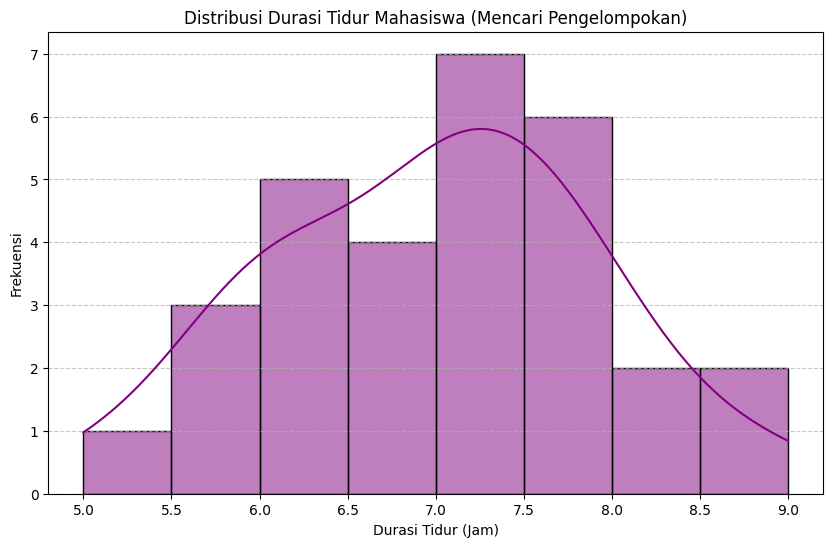

In [14]:
plt.figure(figsize=(10, 6))

# Plot distribusi dengan Histogram (bar) dan Density Plot (garis halus)
sns.histplot(dataset['Durasi Tidur (Jam)'], kde=True, binwidth=0.5, color='purple')

# Tambahkan label dan judul
plt.title('Distribusi Durasi Tidur Mahasiswa (Mencari Pengelompokan)')
plt.xlabel('Durasi Tidur (Jam)')
plt.ylabel('Frekuensi')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

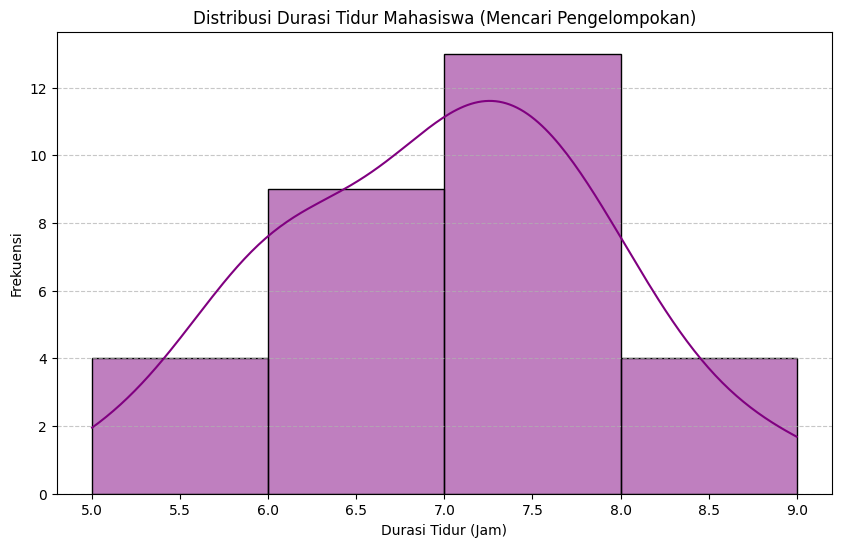

In [15]:
plt.figure(figsize=(10, 6))

# Plot distribusi dengan Histogram (bar) dan Density Plot (garis halus)
sns.histplot(dataset['Durasi Tidur (Jam)'], kde=True, binwidth=1, color='purple')

# Tambahkan label dan judul
plt.title('Distribusi Durasi Tidur Mahasiswa (Mencari Pengelompokan)')
plt.xlabel('Durasi Tidur (Jam)')
plt.ylabel('Frekuensi')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.close()

In [17]:
grouping_result = dataset.groupby('Durasi Tidur (Jam)')['Nama Mahasiswa'].apply(list).reset_index()

# Menampilkan hasil yang sudah disederhanakan
for index, row in grouping_result.iterrows():
    durasi = row['Durasi Tidur (Jam)']
    nama_list = ', '.join(row['Nama Mahasiswa'])
    jumlah = len(row['Nama Mahasiswa'])
    
    print(f"Durasi Tidur: {durasi} jam ({jumlah} Mahasiswa)")
    print(f"Nama Mahasiswa: {nama_list}")
    print('-' * 50)  # Pemisah antar grup


Durasi Tidur: 5.0 jam (1 Mahasiswa)
Nama Mahasiswa: Zaki M.
--------------------------------------------------
Durasi Tidur: 5.5 jam (1 Mahasiswa)
Nama Mahasiswa: Wawan C.
--------------------------------------------------
Durasi Tidur: 5.8 jam (1 Mahasiswa)
Nama Mahasiswa: Xenia Z.
--------------------------------------------------
Durasi Tidur: 5.9 jam (1 Mahasiswa)
Nama Mahasiswa: Doni H.
--------------------------------------------------
Durasi Tidur: 6.0 jam (2 Mahasiswa)
Nama Mahasiswa: Eko H., Yayan K.
--------------------------------------------------
Durasi Tidur: 6.1 jam (1 Mahasiswa)
Nama Mahasiswa: Ahmad F.
--------------------------------------------------
Durasi Tidur: 6.2 jam (1 Mahasiswa)
Nama Mahasiswa: Sari L.
--------------------------------------------------
Durasi Tidur: 6.3 jam (1 Mahasiswa)
Nama Mahasiswa: Elsa I.
--------------------------------------------------
Durasi Tidur: 6.5 jam (1 Mahasiswa)
Nama Mahasiswa: Bunga S.
---------------------------------------

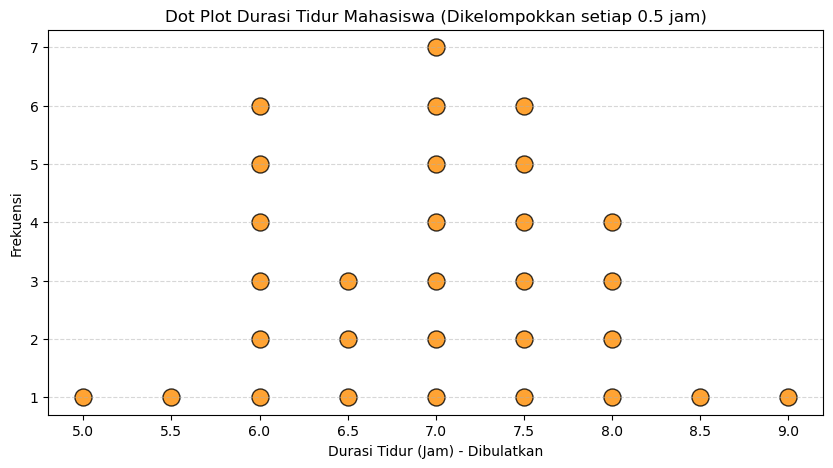

In [ ]:
faktor_pembulatan = 0.5
durasi_binning = np.round(dataset['Durasi Tidur (Jam)'] / faktor_pembulatan) * faktor_pembulatan

# 2. Hitung Frekuensi dan Tentukan Posisi Stack
x_coords = []
y_coords = []
value_counts = Counter() 

for value in sorted(durasi_binning.tolist()):
    y_coords.append(value_counts[value] + 1)
    x_coords.append(value)
    value_counts[value] += 1

# 3. Buat Dot Plot
plt.figure(figsize=(10, 5))
plt.scatter(x=x_coords, y=y_coords, s=150, color='darkorange', edgecolor='black', alpha=0.8)

# Label dan Judul
plt.title(f'Dot Plot Durasi Tidur Mahasiswa (Dikelompokkan setiap {faktor_pembulatan} jam)')
plt.xlabel('Durasi Tidur (Jam) - Dibulatkan')
plt.ylabel('Frekuensi')
plt.yticks(range(1, max(y_coords) + 1)) 
plt.xticks(sorted(value_counts.keys())) # Tampilkan hanya nilai yang ada

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [18]:
# Mengambil kolom data 'durasi tidur' dari dataset
Jam = dataset['Durasi Tidur (Jam)']

# Membuatt struktur stem dan leaf
stem_leaf = {}
for value in Jam:
    val = int(round(value * 10))
    stem, leaf = divmod(val, 10)
    stem_leaf.setdefault(stem, []).append(leaf)

# Menyiapkan data untuk tabulate
table_data = []
for stem in sorted(stem_leaf.keys()):
    leaves = ' '.join(str(l) for l in sorted(stem_leaf[stem]))
    table_data.append([stem, leaves])

# Menampilkan tabel
print(tabulate(table_data, headers=["Stem", "Leaves"], tablefmt="grid"))


+--------+---------------------------+
|   Stem | Leaves                    |
+========+===========================+
|      5 | 0 5 8 9                   |
+--------+---------------------------+
|      6 | 0 0 1 2 3 5 7 8 9         |
+--------+---------------------------+
|      7 | 0 0 1 2 2 3 4 5 5 6 7 8 9 |
+--------+---------------------------+
|      8 | 0 1 5                     |
+--------+---------------------------+
|      9 | 0                         |
+--------+---------------------------+
